In [57]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras import models, layers
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [58]:
(x_train, y_train), (x_val_test, y_val_test) = mnist.load_data()

x_val = x_val_test[:int(x_val_test.shape[0]/2)]
y_val = y_val_test[:int(y_val_test.shape[0]/2)]

x_test = x_val_test[int(x_val_test.shape[0]/2):]
y_test = y_val_test[int(y_val_test.shape[0]/2):]

In [59]:
print("Sample Image:")
cv2_imshow(x_train[0])
print("Label: ",y_train[0])

Sample Image:


Label:  5


In [60]:
x_train = x_train.astype("float32")
x_val = x_val.astype("float32")
x_test = x_test.astype("float32")

x_train /= 255.0
x_val /= 255.0
x_test /= 255.0

x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_val = x_val.reshape(x_val.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

y_train = np_utils.to_categorical(y_train, 10)
y_val = np_utils.to_categorical(y_val, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [61]:
model = Sequential()

model.add(layers.Conv2D(6, kernel_size=(5,5), strides = (1,1), padding="same", activation="relu", input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides = (2,2), padding="valid"))

model.add(layers.Conv2D(16, kernel_size=(5,5), strides = (1,1), padding="valid", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides = (2,2), padding="valid"))

model.add(layers.Conv2D(120, kernel_size=(5,5), strides = (1,1), padding="valid", activation="relu"))
model.add(layers.Flatten())

model.add(layers.Dense(84, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=["accuracy"])

In [62]:
hist = model.fit(x=x_train, y=y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), verbose=1)

Epoch 1/10
469/469 [==============================] - 33s 69ms/step - loss: 0.7102 - accuracy: 0.7828 - val_loss: 0.1335 - val_accuracy: 0.9570
Epoch 2/10
469/469 [==============================] - 31s 67ms/step - loss: 0.1062 - accuracy: 0.9678 - val_loss: 0.0805 - val_accuracy: 0.9740
Epoch 3/10
469/469 [==============================] - 31s 67ms/step - loss: 0.0658 - accuracy: 0.9793 - val_loss: 0.0803 - val_accuracy: 0.9744
Epoch 4/10
469/469 [==============================] - 31s 67ms/step - loss: 0.0515 - accuracy: 0.9850 - val_loss: 0.0628 - val_accuracy: 0.9794
Epoch 5/10
469/469 [==============================] - 31s 67ms/step - loss: 0.0395 - accuracy: 0.9874 - val_loss: 0.0568 - val_accuracy: 0.9812
Epoch 6/10
469/469 [==============================] - 31s 67ms/step - loss: 0.0325 - accuracy: 0.9901 - val_loss: 0.0556 - val_accuracy: 0.9822
Epoch 7/10
469/469 [==============================] - 31s 67ms/step - loss: 0.0278 - accuracy: 0.9910 - val_loss: 0.0487 - val_accuracy:

In [63]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy')

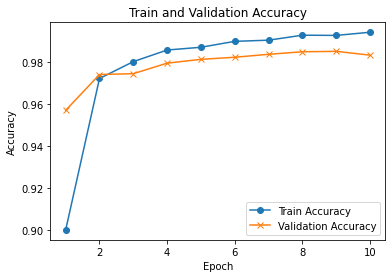

In [64]:
f, ax = plt.subplots()
ax.plot([None] + hist.history["accuracy"], "o-")
ax.plot([None] + hist.history["val_accuracy"], "x-")
ax.set_title("Train and Validation Accuracy")
ax.legend(["Train Accuracy", "Validation Accuracy"], loc=0)
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")

Text(0, 0.5, 'Loss')

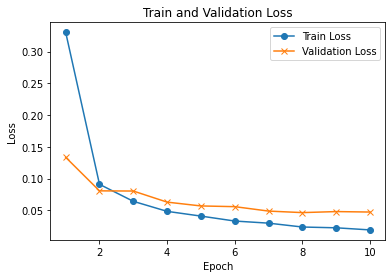

In [65]:
f, ax = plt.subplots()
ax.plot([None] + hist.history["loss"], "o-")
ax.plot([None] + hist.history["val_loss"], "x-")
ax.set_title("Train and Validation Loss")
ax.legend(["Train Loss", "Validation Loss"], loc=0)
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

In [66]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=128)
print("Test Loss = {}, Test Accuracy = {}".format(test_loss, test_accuracy))

40/40 [==============================] - 1s 26ms/step - loss: 0.0172 - accuracy: 0.9936
Test Loss = 0.01719963178038597, Test Accuracy = 0.9936000108718872


In [67]:
from sklearn.metrics import accuracy_score

In [68]:
predictions = model.predict(x_test[0:10])

In [71]:
print("Test predict with the trained model")
print("-----------------------------------")
for i in range(10):
  print("Case #{}: Predicted Number = {}, Actual Number = {}".format(i, np.argmax(predictions[i]), np.argmax(y_test[i])))

print("\nTest predict accuracy = {}%".format(accuracy_score(list(np.argmax(i) for i in y_test[0:10]), list(np.argmax(j) for j in predictions)) * 100))

Test predict with the trained model
-----------------------------------
Case #0: Predicted Number = 3, Actual Number = 3
Case #1: Predicted Number = 9, Actual Number = 9
Case #2: Predicted Number = 9, Actual Number = 9
Case #3: Predicted Number = 8, Actual Number = 8
Case #4: Predicted Number = 4, Actual Number = 4
Case #5: Predicted Number = 1, Actual Number = 1
Case #6: Predicted Number = 0, Actual Number = 0
Case #7: Predicted Number = 6, Actual Number = 6
Case #8: Predicted Number = 0, Actual Number = 0
Case #9: Predicted Number = 9, Actual Number = 9

Test predict accuracy = 100.0%
